# Dataset

Download dataset

In [2]:
import os
if not os.path.isfile('dognition_data_aggregated_by_dogid.xlsx'):
  ! gdown 1aqPah5aYlkvTiT9MLrOVfC4_NZYBQT0q

Downloading...
From: https://drive.google.com/uc?id=1aqPah5aYlkvTiT9MLrOVfC4_NZYBQT0q
To: /content/dognition_data_aggregated_by_dogid.xlsx
100% 4.41M/4.41M [00:00<00:00, 53.1MB/s]


Load and dispaly dataset

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dognition_data_aggregated_by_dogid dataset
data_path = 'dognition_data_aggregated_by_dogid.xlsx'
dognition_data = pd.read_excel(data_path)

# Display the first few rows of the dataset to understand its structure
dognition_data.head()


,Dog ID,Total Tests Completed,Mean ITI (days),Mean ITI (minutes),Median ITI (days),Median ITI (minutes),Time diff between first and last game (days),Time diff between first and last game (minutes),User ID,Gender,...,Membership_ID,Subscribed,City,State,Zip,Country,Exclude,Free_Start_User,Last_Active_At,Membership_Type
0,fd27b272-7144-11e5-ba71-058fbc01cf0b,21,28.201076,40609.549167,0.004687,6.750000,564.021516,812190.983333,ce134e42-7144-11e5-ba71-058fbc01cf0b,female,...,2.0,1.0,Grand Forks,ND,58201,US,0,0,2015-03-12 00:25:00,2
1,fd27b5ba-7144-11e5-ba71-058fbc01cf0b,20,0.413307,595.162281,0.005845,8.416667,7.852836,11308.083333,ce1353d8-7144-11e5-ba71-058fbc01cf0b,male,...,1.0,1.0,Barre,MA,01005,US,0,0,00:00:00,1
2,fd27b6b4-7144-11e5-ba71-058fbc01cf0b,2,0.009132,13.150000,0.009132,13.150000,0.009132,13.150000,ce135ab8-7144-11e5-ba71-058fbc01cf0b,male,...,1.0,1.0,Darien,CT,06820,US,0,0,00:00:00,1
3,fd27b79a-7144-11e5-ba71-058fbc01cf0b,11,56.115179,80805.858333,0.004433,6.383333,561.151794,808058.583333,ce13507c-7144-11e5-ba71-058fbc01cf0b,male,...,1.0,1.0,Winnetka,IL,60093,US,0,0,2014-09-12 19:26:00,1
4,fd27b86c-7144-11e5-ba71-058fbc01cf0b,31,7.734254,11137.326111,0.000399,0.575000,232.027627,334119.783333,ce135e14-7144-11e5-ba71-058fbc01cf0b,female,...,2.0,1.0,Raleigh,NC,27606,US,1,0,00:00:00,2


# Exercise 1



---

## Data Exploration

### Objective
Explore the 'dognition_data_aggregated_by_dogid' dataset to understand its structure and identify potential data quality issues.

### Tasks and Analysis

#### Task 1: Count Unique Dog IDs and User IDs
**Goal**: Determine the number of unique dogs and users in the dataset.


In [5]:
unique_dog_ids = dognition_data['Dog ID'].nunique()
unique_user_ids = dognition_data['User ID'].nunique()
unique_dog_ids, unique_user_ids

(17986, 16261)

**Results**:
- Unique Dog IDs: 17,986
- Unique User IDs: 16,261


#### Task 2: Identify Represented Countries and Investigate Unusual State Values
**Goal**: Analyze the geographical distribution of the dataset.


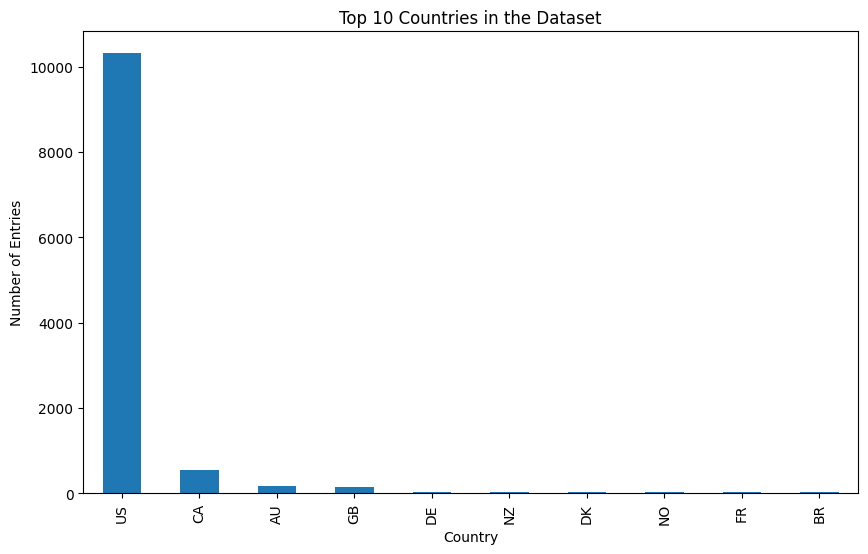

In [6]:
import matplotlib.pyplot as plt

countries = dognition_data['Country'].value_counts()
states = dognition_data['State'].value_counts()

plt.figure(figsize=(10, 6))
countries.head(10).plot(kind='bar')
plt.title('Top 10 Countries in the Dataset')
plt.xlabel('Country')
plt.ylabel('Number of Entries')
plt.show()

**Results**:
- The dataset predominantly features data from the United States.
- The most common states include California, New York, North Carolina, Texas, and Florida.


#### Task 3: Examine Outliers in the Sign in Count Variable
**Goal**: Identify outliers in the 'Sign in Count' variable.


In [9]:
sign_in_counts = dognition_data['Sign_in_Count']
sign_in_stats = sign_in_counts.describe()
sign_in_stats

count    17985.000000
mean         8.329386
std         68.940494
min          0.000000
25%          2.000000
50%          3.000000
75%          6.000000
max       1695.000000
Name: Sign_in_Count, dtype: float64

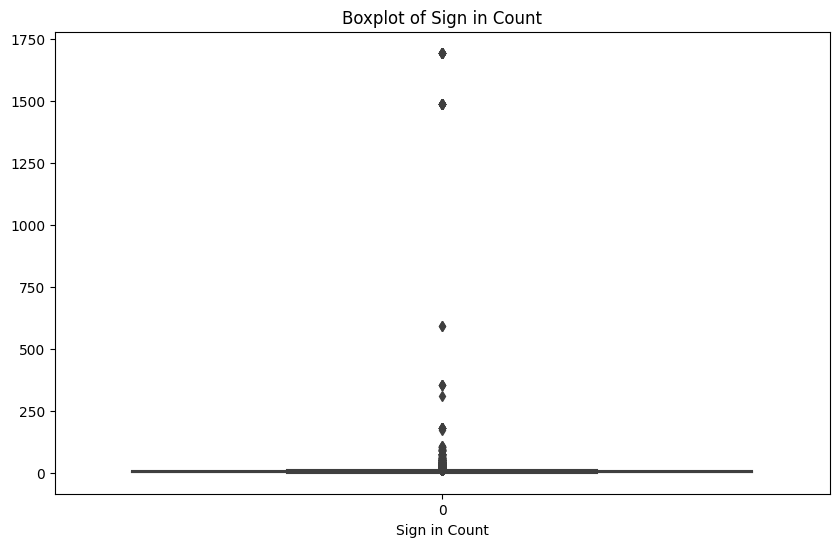

In [23]:

plt.figure(figsize=(10, 6))
# plt.boxplot(sign_in_counts.to_numpy(), vert=False)
sns.boxplot(sign_in_counts)
plt.title('Boxplot of Sign in Count')
plt.xlabel('Sign in Count')
plt.show()


**Results**:
- The 'Sign in Count' variable has a wide range, with a maximum of 1695.
- There are significant outliers, indicating extreme values in user sign-in counts.




### Conclusion
The dataset contains a large and diverse number of dogs and users, primarily from the United States. The 'Sign in Count' variable exhibits considerable variability, suggesting the need for careful handling of outliers in further analyses.

---


# Exercise 2



---

## Analyzing Dog Features

### Objective
Investigate how different dog features correlate with the number of tests completed. The focus is on variables like Total Tests Completed, Breed, Breed Type, Breed Group, and Dimension.

### Analysis and Visualization

#### Task: Explore the Correlation between Dog Features and Total Tests Completed


In [ ]:
# Selecting relevant columns for analysis
dog_features = dognition_data[['Total Tests Completed', 'Breed', 'Breed_Type', 'Breed_Group', 'Dimension']]


1. **Distribution of Total Tests Completed**
    - **Goal**: Understand the distribution of the number of tests completed by dogs.


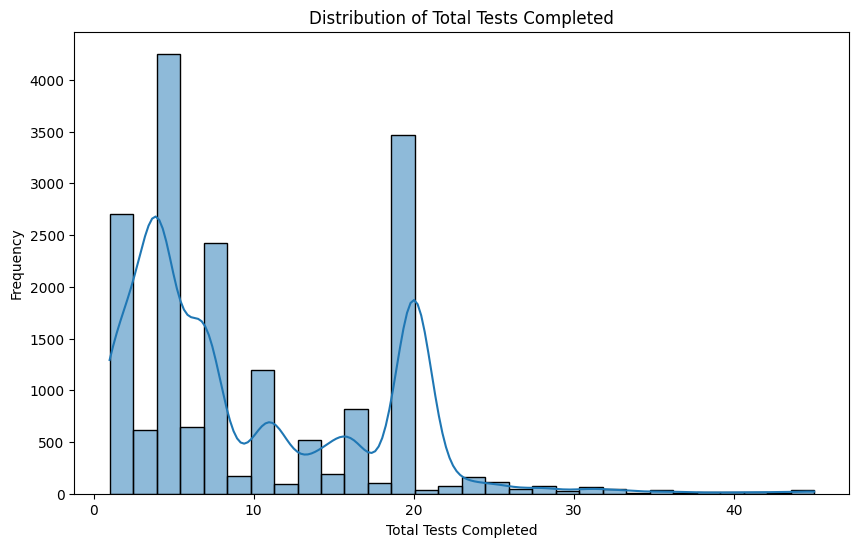

In [31]:
plt.figure(figsize=(10, 6))
sns.histplot(dog_features['Total Tests Completed'], bins=30, kde=True)
plt.title('Distribution of Total Tests Completed')
plt.xlabel('Total Tests Completed')
plt.ylabel('Frequency')
plt.show()


- **Observation**: Most dogs complete fewer tests, with a decline in frequency as the number of tests completed increases.

2. **Total Tests Completed by Breed Type**
    - **Goal**: Analyze if certain breed types are more engaged in completing tests.


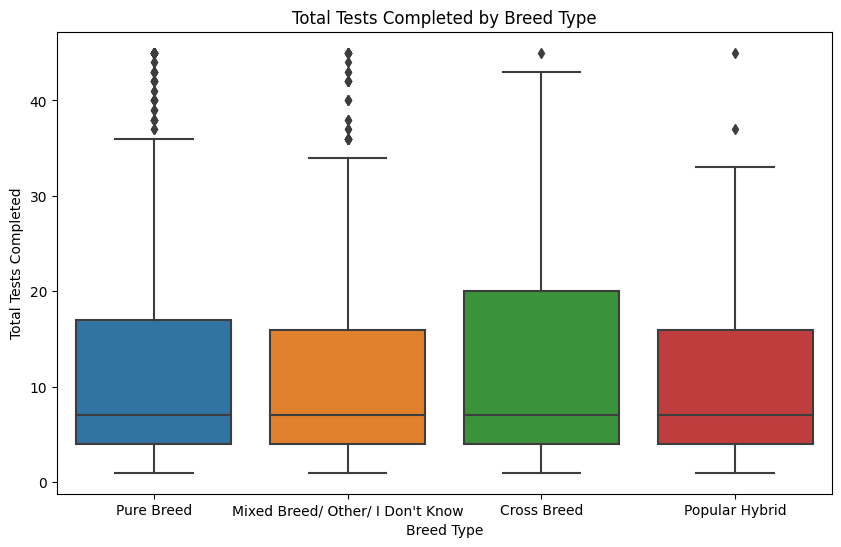

In [32]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Breed_Type', y='Total Tests Completed', data=dog_features)
plt.title('Total Tests Completed by Breed Type')
plt.xlabel('Breed Type')
plt.ylabel('Total Tests Completed')
plt.show()


- **Observation**: The boxplot provides insights into the engagement levels of different breed types in completing tests.


3. **Total Tests Completed by Breed Group**
    - **Goal**: Determine if specific breed groups tend to complete more tests.



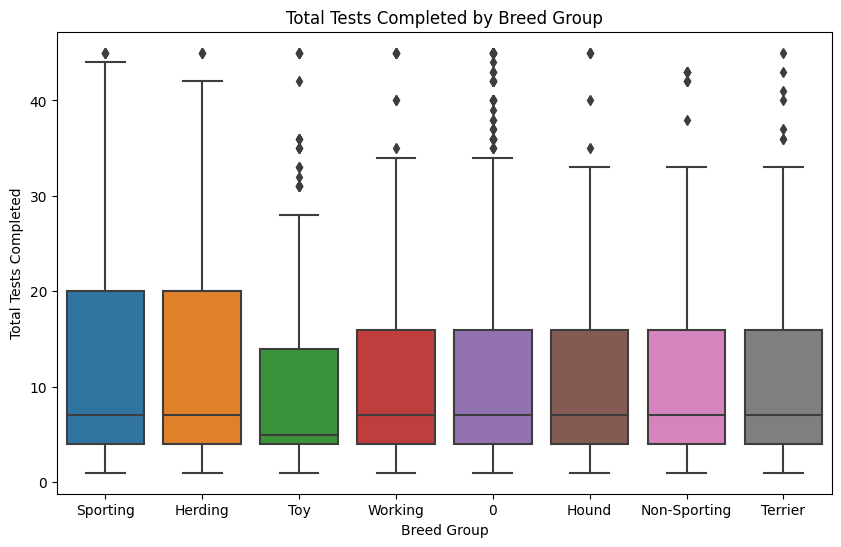

In [33]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Breed_Group', y='Total Tests Completed', data=dog_features)
plt.title('Total Tests Completed by Breed Group')
plt.xlabel('Breed Group')
plt.ylabel('Total Tests Completed')
plt.show()

- **Observation**: The visualization helps identify breed groups with higher or lower test completion rates.


4. **Total Tests Completed by Dimension**
    - **Goal**: Examine if dog dimensions correlate with test completion rates.

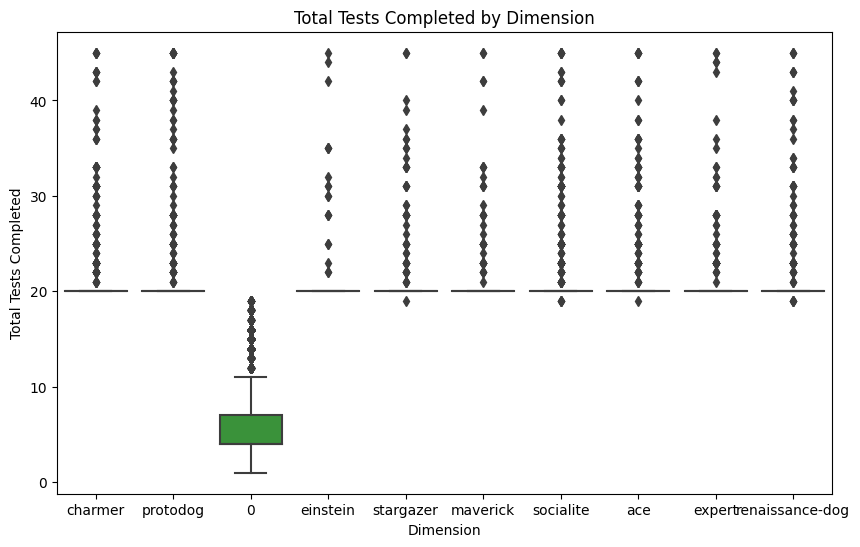

In [35]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Dimension', y='Total Tests Completed', data=dog_features)
plt.title('Total Tests Completed by Dimension')
plt.xlabel('Dimension')
plt.ylabel('Total Tests Completed')
plt.show()

- **Observation**: The plot shows the relationship between different dog dimensions and the number of tests completed.


### Conclusion
The analysis reveals significant insights into how various dog features, including breed type, breed group, and dimensions, influence the number of tests completed. This understanding is crucial for tailoring test designs and strategies to different dog profiles to enhance test participation and effectiveness.

---

# Exercise 3

## Exploring Owner Traits

### Objective
To examine how characteristics of dog owners, specifically whether the dog has been DNA tested or fixed (spayed/neutered), correlate with the total number of tests completed by their dogs.
### Analysis and Visualization


In [37]:
# Selecting relevant owner trait columns for analysis
owner_traits = dognition_data[['Total Tests Completed', 'DNA_Tested', 'Dog_Fixed']]


#### 1. Distribution of Owner Traits
- **DNA Tested**:
    - The bar chart shows the number of dogs that have been DNA tested versus those that have not.

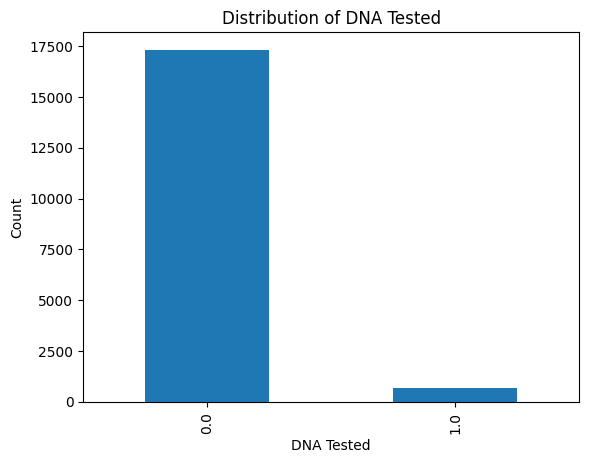

In [38]:
owner_traits['DNA_Tested'].value_counts().plot(kind='bar')
plt.title('Distribution of DNA Tested')
plt.xlabel('DNA Tested')
plt.ylabel('Count')
plt.show()

- **Dog Fixed (Spayed/Neutered)**:
    - The bar chart indicates the number of dogs that are fixed compared to those that are not.


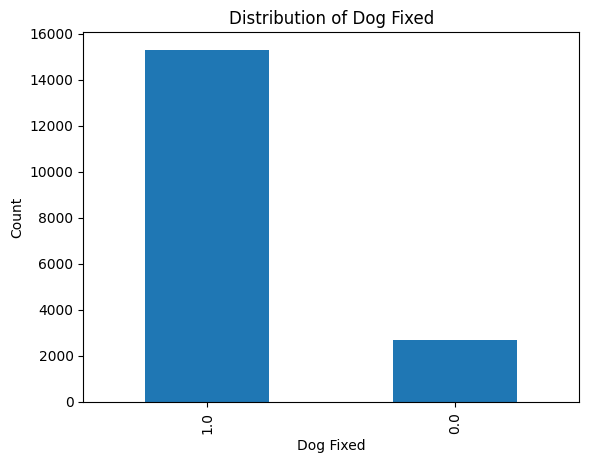

In [39]:
owner_traits['Dog_Fixed'].value_counts().plot(kind='bar')
plt.title('Distribution of Dog Fixed')
plt.xlabel('Dog Fixed')
plt.ylabel('Count')
plt.show()

#### 2. Correlation Analysis with Total Tests Completed
- **DNA Tested and Total Tests Completed**:
    - The boxplot compares the total tests completed by dogs that have been DNA tested against those that haven't.


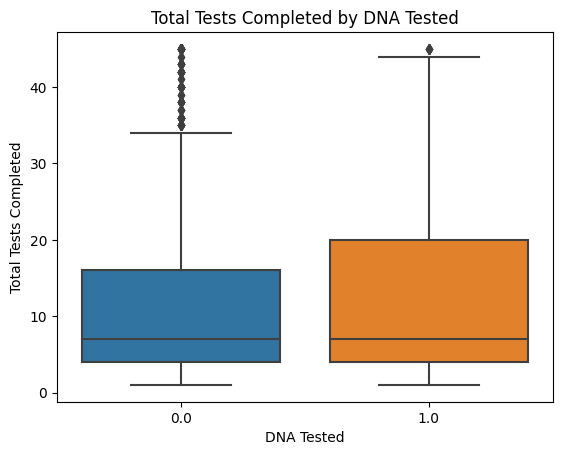

In [40]:
sns.boxplot(x='DNA_Tested', y='Total Tests Completed', data=owner_traits)
plt.title('Total Tests Completed by DNA Tested')
plt.xlabel('DNA Tested')
plt.ylabel('Total Tests Completed')
plt.show()

- **Dog Fixed and Total Tests Completed**:
    - The boxplot illustrates the relationship between being fixed and the total number of tests completed.


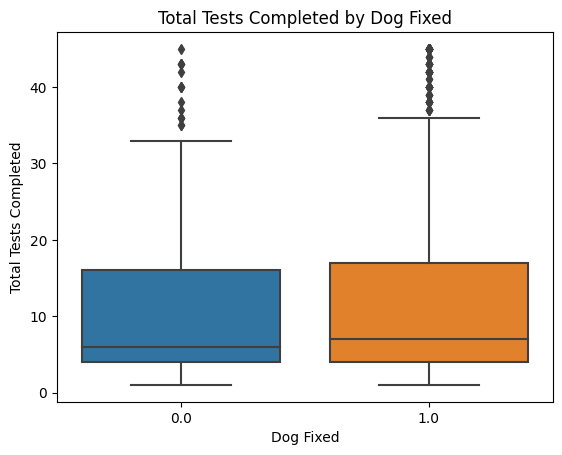

In [41]:
sns.boxplot(x='Dog_Fixed', y='Total Tests Completed', data=owner_traits)
plt.title('Total Tests Completed by Dog Fixed')
plt.xlabel('Dog Fixed')
plt.ylabel('Total Tests Completed')
plt.show()

### Conclusion
The analysis offers insights into how owner decisions, like DNA testing and fixing their dogs, relate to the engagement of dogs in completing tests. Understanding these correlations can help in tailoring dog tests and improving participation rates.

---

# Exercise 4


## Geographic Analysis

### Objective
Investigate the geographic distribution of Dognition customers and their test completion rates, focusing on both country and state levels.

### Analysis and Visualization


In [45]:
# Selecting relevant geographic columns for analysis
geographic_data = dognition_data[['Total Tests Completed', 'Country', 'State']]

# Exploring the distribution of customers by country
country_distribution = geographic_data['Country'].value_counts()

# Exploring the distribution of customers by state (focusing on the US)
us_states_distribution = geographic_data[geographic_data['Country'] == 'US']['State'].value_counts()

# Calculating the average number of tests completed per country
avg_tests_per_country = geographic_data.groupby('Country')['Total Tests Completed'].mean().sort_values(ascending=False)

# Calculating the average number of tests completed per state in the US
avg_tests_per_state_us = geographic_data[geographic_data['Country'] == 'US'].groupby('State')['Total Tests Completed'].mean().sort_values(ascending=False)


#### 1. Distribution of Customers by Geography

- **By Country**:
    - The bar chart displays the top 10 countries with the highest number of Dognition customers.



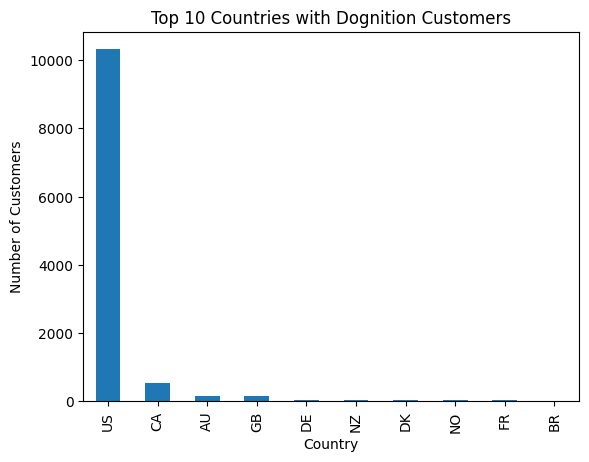

In [46]:
country_distribution.head(10).plot(kind='bar')
plt.title('Top 10 Countries with Dognition Customers')
plt.xlabel('Country')
plt.ylabel('Number of Customers')
plt.show()

- **By State (United States)**:
    - The bar chart shows the top 10 U.S. states with the largest number of customers.

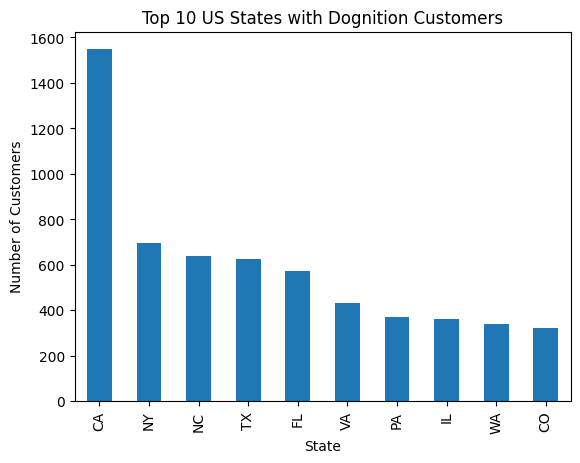

In [47]:
us_states_distribution.head(10).plot(kind='bar')
plt.title('Top 10 US States with Dognition Customers')
plt.xlabel('State')
plt.ylabel('Number of Customers')
plt.show()

#### 2. Correlation Analysis: Geographic Location and Total Tests Completed
- **By Country**:
    - The bar chart indicates the average number of tests completed by customers from different countries.



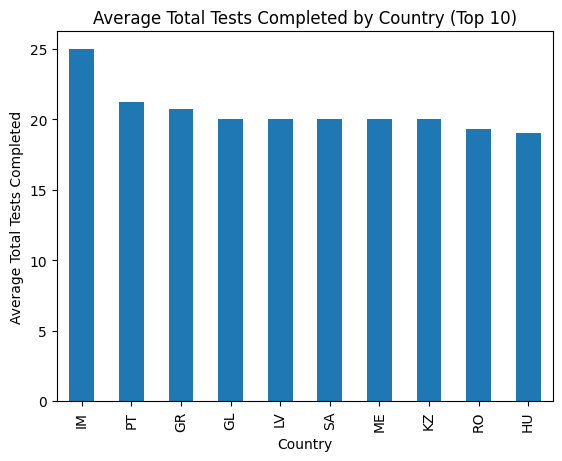

In [48]:
avg_tests_per_country.head(10).plot(kind='bar')
plt.title('Average Total Tests Completed by Country (Top 10)')
plt.xlabel('Country')
plt.ylabel('Average Total Tests Completed')
plt.show()

- **By US State**:
    - The chart shows the average number of tests completed by customers in different U.S. states.


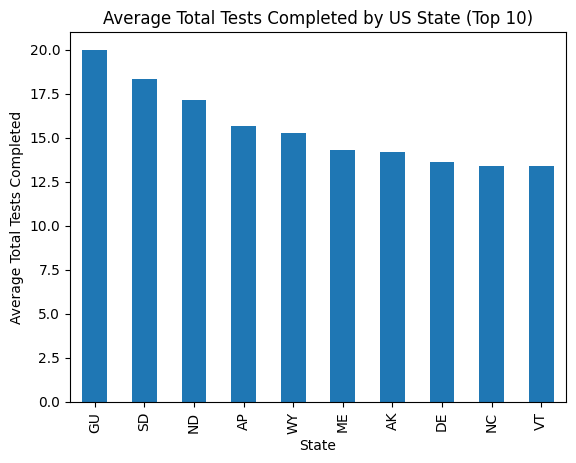

In [49]:
avg_tests_per_state_us.head(10).plot(kind='bar')
plt.title('Average Total Tests Completed by US State (Top 10)')
plt.xlabel('State')
plt.ylabel('Average Total Tests Completed')
plt.show()


### Conclusion
This analysis provides valuable insights into the geographic distribution of Dognition's customer base and how location correlates with dog test completion rates. Understanding these patterns can assist Dognition in targeting specific regions or adapting their strategies to different geographic markets.

---

# Exercise 5



## Exercise 5: Completion Rate Analysis

### Objective
Explore the relationship between the rate of test completion, as indicated by Median ITI (Inter-Test Interval) and Mean ITI, and the total number of tests completed.

### Analysis and Visualization

In [50]:
# Selecting relevant ITI columns for analysis
iti_data = dognition_data[['Total Tests Completed', 'Mean ITI (days)', 'Median ITI (days)']]


#### 1. Distribution of ITI Metrics
- **Mean ITI (days)**:
    - The histogram shows the distribution of the mean time interval between tests (in days).


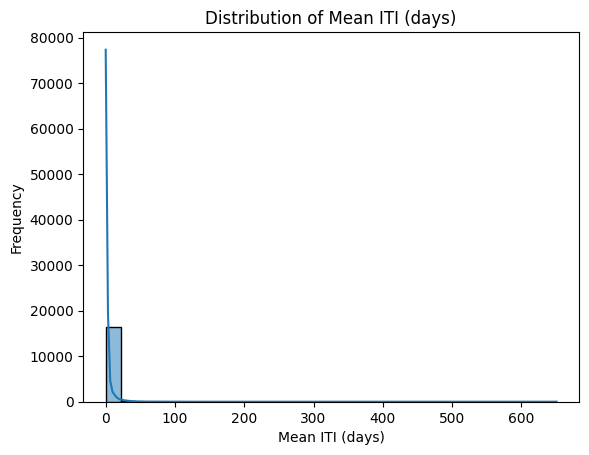

In [51]:
sns.histplot(iti_data['Mean ITI (days)'], bins=30, kde=True)
plt.title('Distribution of Mean ITI (days)')
plt.xlabel('Mean ITI (days)')
plt.ylabel('Frequency')
plt.show()


- **Median ITI (days)**:
    - The histogram presents the distribution of the median time interval between tests (in days).


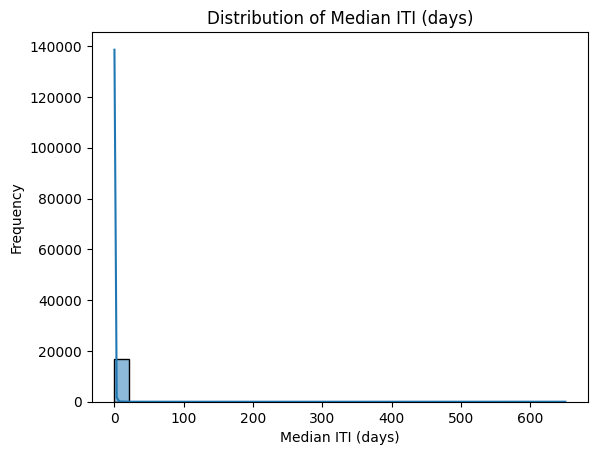

In [52]:
sns.histplot(iti_data['Median ITI (days)'], bins=30, kde=True)
plt.title('Distribution of Median ITI (days)')
plt.xlabel('Median ITI (days)')
plt.ylabel('Frequency')
plt.show()


#### 2. Correlation Analysis with Total Tests Completed
- **Mean ITI (days) vs. Total Tests Completed**:
    - The scatterplot explores the relationship between the mean ITI and the total number of tests completed.



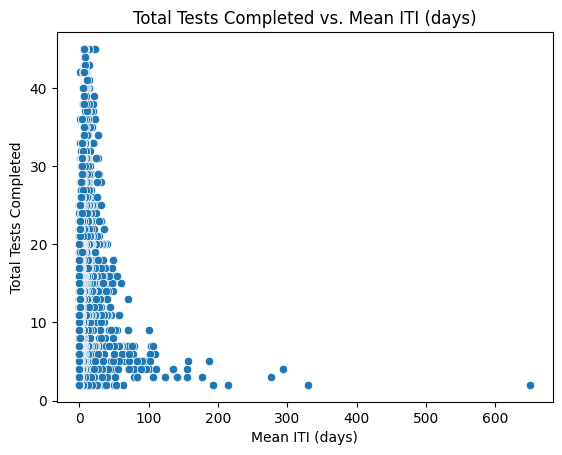

In [53]:
sns.scatterplot(x='Mean ITI (days)', y='Total Tests Completed', data=iti_data)
plt.title('Total Tests Completed vs. Mean ITI (days)')
plt.xlabel('Mean ITI (days)')
plt.ylabel('Total Tests Completed')
plt.show()


- **Median ITI (days) vs. Total Tests Completed**:
    - The scatterplot examines the relationship between the median ITI and the total number of tests completed.





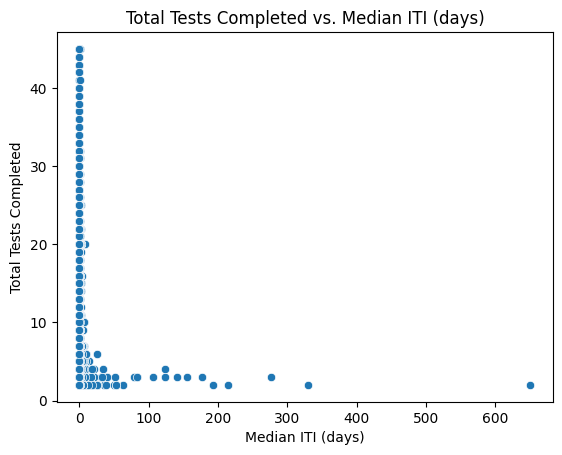

In [54]:
sns.scatterplot(x='Median ITI (days)', y='Total Tests Completed', data=iti_data)
plt.title('Total Tests Completed vs. Median ITI (days)')
plt.xlabel('Median ITI (days)')
plt.ylabel('Total Tests Completed')
plt.show()

### Conclusion
The analysis provides insights into how the intervals between test completions (both mean and median ITI) relate to the total number of tests completed. Understanding these relationships can help in identifying patterns of engagement and potential factors influencing the frequency of test participation.

---